In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
X_train=np.load(r'C:\Users\Lenovo\Desktop\X_train.npy')
Y_train=np.load(r'C:\Users\Lenovo\Desktop\Y_train.npy')
X_test=np.load(r'C:\Users\Lenovo\Desktop\X_test.npy')
Y_test=np.load(r'C:\Users\Lenovo\Desktop\Y_test.npy')

In [4]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2000, 128, 128, 1) (120, 128, 128, 1) (2000, 2) (120, 2)


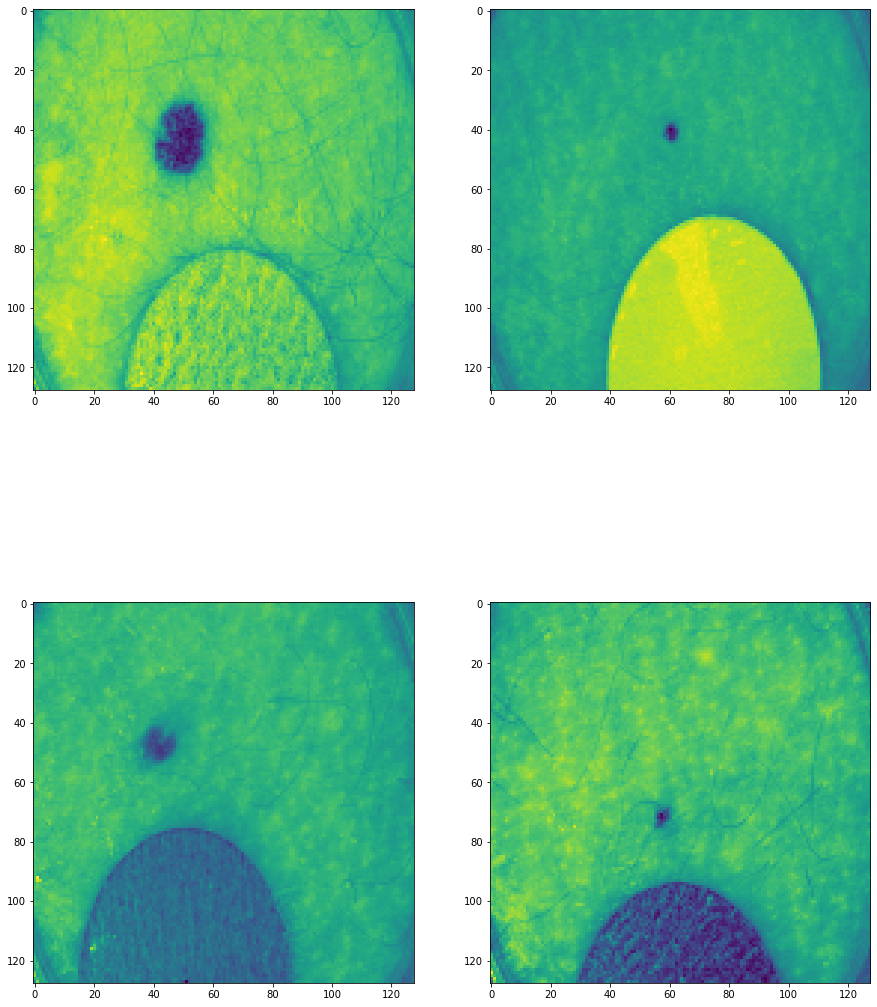

In [5]:
fig,axarr=plt.subplots(2,2, figsize=(15,20))
axarr[0,0].imshow(X_train[0],interpolation="nearest")
axarr[0,1].imshow(X_train[1],interpolation="nearest")
axarr[1,0].imshow(X_train[2],interpolation="nearest")
axarr[1,1].imshow(X_train[3],interpolation="nearest")

In [6]:
print(Y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [7]:
Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")

In [8]:
Y_test

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1,

In [9]:
Y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

## PCA

In [10]:
pca=PCA(n_components=2)
pca=pca.fit_transform(X_train.reshape(2000,128*128))
plt.scatter(pca[:,0],pca[:,1],c=Y_train[:,0])
plt.show()

In [11]:
pca=PCA(n_components=120)
X_train=pca.fit_transform(X_train.reshape(2000,128*128))
X_test=pca.fit_transform(X_test.reshape(120,128*128))
print(X_train.shape,X_test.shape)

(2000, 120) (120, 120)


## KNN

In [17]:
clf=KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train)
clf_score=clf.score(X_test,Y_test)
print("Accuracy: ",clf_score)
Y_pred=clf.predict(X_test)
# con_mat=confusion_matrix(Y_test,Y_pred,labels=clf.classes_)
# disp=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=cld.classes_)
classification_rep=classification_report(Y_test,Y_pred)

print("classificiation report\n",classification_rep)

Accuracy:  0.35833333333333334
classificiation report
               precision    recall  f1-score   support

           0       0.58      0.48      0.53        60
           1       0.61      0.23      0.34        60

   micro avg       0.59      0.36      0.45       120
   macro avg       0.59      0.36      0.43       120
weighted avg       0.59      0.36      0.43       120
 samples avg       0.36      0.36      0.36       120



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
clf=KNeighborsClassifier(n_neighbors=6).fit(X_train,Y_train)
clf_score=clf.score(X_test,Y_test)
print("Accuracy: ",clf_score)
Y_pred=clf.predict(X_test)
# con_mat=confusion_matrix(Y_test,Y_pred,labels=clf.classes_)
# disp=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=cld.classes_)
classification_rep=classification_report(Y_test,Y_pred)

print("classificiation report\n",classification_rep)

Accuracy:  0.5
classificiation report
               precision    recall  f1-score   support

           0       0.56      0.60      0.58        60
           1       0.60      0.40      0.48        60

   micro avg       0.58      0.50      0.54       120
   macro avg       0.58      0.50      0.53       120
weighted avg       0.58      0.50      0.53       120
 samples avg       0.50      0.50      0.50       120



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
clf=KNeighborsClassifier(n_neighbors=23).fit(X_train,Y_train)
clf_score=clf.score(X_test,Y_test)
print("Accuracy: ",clf_score)
Y_pred=clf.predict(X_test)
# con_mat=confusion_matrix(Y_test,Y_pred,labels=clf.classes_)
# disp=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=cld.classes_)
classification_rep=classification_report(Y_test,Y_pred)

print("classificiation report\n",classification_rep)

Accuracy:  0.5666666666666667
classificiation report
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        60
           1       0.58      0.47      0.52        60

   micro avg       0.57      0.57      0.57       120
   macro avg       0.57      0.57      0.56       120
weighted avg       0.57      0.57      0.56       120
 samples avg       0.57      0.57      0.57       120

